# Kinetic Models

These models are translated directly from the corresponding Igor Pro files made by Dr. DiVerdi. 

The basic idea is to treat pressure in a simple fashion, either by having an instantaneous rise time or via a simple linear increase approximating the reaction. After this creation of pressure, the model is stepped in small increments. In other words, we use initial pressure to compute force, acceleration, etc. These new values are used to compute a new pressure, which is used to compute new values of force, acceleration, etc. And on and on it goes until the projectile reaches the end of the tube. 

Modelling what happens to the projectile after it leaves the tube is difficult since pressure drops rapidly and the system becomes open ended. It can only ever slow down from there, so it's not a particularly fruitful line of modelling, either. 

Two plotting functions have been provided as well. One plots all of the values tracked while the other creates a PV diagram. 

In [1]:
# Importing things
import matplotlib.pyplot as plt
import numpy as np


In [2]:
'''
Instantaneous Pressure Increase Model

The input is the start pressure (P_initial, which I call Pi),
and the timestep, which is the length of time between iterative computations

The output will be a series of arrays as a function of time:
1 - Pressure
2 - Volume 
3 - Force
4 - Acceleration (of projectile)
5 - Velocity (of projectile)
6 - Position (of projectile)
'''

def Instant_Rise(Pi,timestep):
    
    # defining experimental values
    muzzle_area = 12.6e-4     # m^2
    muzzle_length = 1.2       # m
    projectile_mass = 10.e-3  # kg
    chamber_volume = 1.5e-3   # m^3
    maximum_volume = chamber_volume + muzzle_area*muzzle_length
    
    # creating output array initial values
    pressure = np.ones(1,dtype=np.float64)*Pi
    volume = np.ones(1,dtype=np.float64)*chamber_volume
    force = np.ones(1,dtype=np.float64)*(pressure[0]*muzzle_area)
    acceleration = np.ones(1,dtype=np.float64)*(force[0]/projectile_mass)
    speed = np.zeros(1,dtype=np.float64)
    position = np.zeros(1,dtype=np.float64)
    
    # I'm changing the original code slightly
    # instead of computing a set length of time and setting pressure to zero
    # when we reach the end of the barrel, I'm just computing until we reach
    # the end of the barrel and stopping
    
    # setting initial i value
    i = 0
    while volume[i] <= maximum_volume:
        # computing the new values
        # basic kinetics
        new_speed = speed[i] + acceleration[i]*timestep
        new_pos = position[i] + new_speed*timestep
        # geometry
        new_vol = chamber_volume + new_pos*muzzle_area
        # Boyle's Law, P1V1 = P2V2
        new_press = pressure[i]*volume[i]/new_vol
        new_force = new_press*muzzle_area
        new_accel = new_force/projectile_mass
        
        # storing new values in array
        speed = np.append(speed,[new_speed],axis=0)
        position = np.append(position,[new_pos],axis=0)
        volume = np.append(volume,[new_vol],axis=0)
        pressure = np.append(pressure,[new_press],axis=0)
        force = np.append(force,[new_force],axis=0)
        acceleration = np.append(acceleration,[new_accel],axis=0)
        
        # incrementing
        i += 1
        
    # Python does not store wave scaling like Igor, so we need a time array
    # we're just going to use a wave scaling style
    time = np.arange(0.,speed.shape[0]*timestep,timestep)
        
    # for ease, the output is stored in a dictionary
    # this just keeps the output minimal, 1 dictionary rather than 7 arrays
    output = {'pressure':pressure,
              'volume':volume,
              'force':force,
              'acceleration':acceleration,
              'speed':speed,
              'position':position,
              'time':time}
        
    return output
    

In [3]:
'''
Linear Pressure Increase Model

This model needs 3 inputs: the timestep for the simulation, and the peak
pressure time and pressure (basically setting slope)

The output will be a series of arrays as a function of time:
1 - Pressure
2 - Volume 
3 - Force
4 - Acceleration (of projectile)
5 - Velocity (of projectile)
6 - Position (of projectile)
'''

def Linear_Rise(P_peak,t_peak,timestep):
    
    # defining experimental values
    muzzle_area = 12.6e-4     # m^2
    muzzle_length = 1.2       # m
    projectile_mass = 10.e-3  # kg
    chamber_volume = 1.5e-3   # m^3
    maximum_volume = chamber_volume + muzzle_area*muzzle_length
    
    # getting index of t_peak
    i_peak = t_peak//timestep
    
    # creating output array initial values
    pressure = np.zeros(1,dtype=np.float64)
    volume = np.ones(1,dtype=np.float64)*chamber_volume
    force = np.ones(1,dtype=np.float64)*(pressure[0]*muzzle_area)
    acceleration = np.ones(1,dtype=np.float64)*(force[0]/projectile_mass)
    speed = np.zeros(1,dtype=np.float64)
    position = np.zeros(1,dtype=np.float64)
    
    # I'm changing the original code slightly
    # instead of computing a set length of time and setting pressure to zero
    # when we reach the end of the barrel, I'm just computing until we reach
    # the end of the barrel and stopping
    
    # setting initial i value
    i = 0
    while volume[i] <= maximum_volume:
        # computing the new values
        # basic kinetics
        new_speed = speed[i] + acceleration[i]*timestep
        new_pos = position[i] + new_speed*timestep
        # geometry
        new_vol = chamber_volume + new_pos*muzzle_area
        if i <= i_peak:
            # line from zero to P_peak
            new_press = (P_peak/i_peak)*i
        else:
            # Boyle's Law, P1V1 = P2V2
            new_press = pressure[i]*volume[i]/new_vol
        # more physics
        new_force = new_press*muzzle_area
        new_accel = new_force/projectile_mass
        
        # storing new values in array
        speed = np.append(speed,[new_speed],axis=0)
        position = np.append(position,[new_pos],axis=0)
        volume = np.append(volume,[new_vol],axis=0)
        pressure = np.append(pressure,[new_press],axis=0)
        force = np.append(force,[new_force],axis=0)
        acceleration = np.append(acceleration,[new_accel],axis=0)
        
        # incrementing
        i += 1
        
    # Python does not store wave scaling like Igor, so we need a time array
    # we're just going to use a wave scaling style
    time = np.arange(0.,speed.shape[0]*timestep,timestep)
    
    # crude check
    if time.shape[0] != pressure.shape[0]:
        time = time[0:-1]
        
    # for ease, the output is stored in a dictionary
    # this just keeps the output minimal, 1 dictionary rather than 7 arrays
    output = {'pressure':pressure,
              'volume':volume,
              'force':force,
              'acceleration':acceleration,
              'speed':speed,
              'position':position,
              'time':time}
        
    return output

In [4]:
'''
Plotting Function

This will take the output from the models and plot it for you
'''

def Kinetic_Model_Plotter(Output,title):
    # unwrapping the data from the dictionary
    time = Output['time']
    pressure = Output['pressure']
    volume = Output['volume']
    force = Output['force']
    acceleration = Output['acceleration']
    speed = Output['speed']
    position = Output['position']

    Figure = plt.figure(figsize=(8,8))            # initialize figure
    Figure.subplots_adjust(hspace=0.5,wspace=0.3) # adds a bit of space between plots
    Figure.suptitle(title)
    
    # initializing different axes/plots
    ax1 = Figure.add_subplot(321)
    ax2 = Figure.add_subplot(322)
    ax3 = Figure.add_subplot(323)
    ax4 = Figure.add_subplot(324)
    ax5 = Figure.add_subplot(325)
    ax6 = Figure.add_subplot(326)
    
    # Plotting things on our plots
    
    # Top left - presure
    ax1.plot(time*1e3,pressure,c='k')
    
    ax1.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax1.set_xlabel('time (ms)')
    ax1.set_ylabel('Pa')
    ax1.title.set_text('Pressure')
    
    # Top right - acceleration
    ax2.plot(time*1e3,acceleration,c='k')
    
    ax2.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax2.set_xlabel('time (ms)')
    ax2.set_ylabel(r'$m\cdot s^{-2}$')
    ax2.title.set_text('Acceleration')
    
    # Middle left - force
    ax3.plot(time*1e3,force,c='k')
    
    ax3.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax3.set_xlabel('time (ms)')
    ax3.set_ylabel('N')
    ax3.title.set_text('Force')
    
    # Middle right - velocity/speed
    ax4.plot(time*1e3,speed,c='k')
    
    ax4.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax4.set_xlabel('time (ms)')
    ax4.set_ylabel(r'$m\cdot s^{-1}$')
    ax4.title.set_text('Velocity')
    
    # Bottom left - volume
    ax5.plot(time*1e3,volume,c='k')
    
    ax5.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax5.set_xlabel('time (ms)')
    ax5.set_ylabel(r'$m^{-3}$')
    ax5.title.set_text('Volume')
    
    # Bottom right - position
    ax6.plot(time*1e3,position,c='k')
    
    ax6.set_xlim(time[0]*1e3,time[-1]*1e3)
    ax6.set_xlabel('time (ms)')
    ax6.set_ylabel('m')
    ax6.title.set_text('Position')
    

In [5]:
'''
PV Plotting Function

This will take the output from the models and plot the PV graph for you

kwargs are used to give you the option of plotting absolute pressure
and specifying atmospheric pressure for the isotherm estimates

To use them, type:
atmospheric=####, this will set the atmospheric pressure to 
whatever you want

If you don't want to use them, don't specify them at all. 
Default is 1 atm pressure
'''

def PV_Plotter(Output,title,**kwargs):
    # unwrapping the data from the dictionary
    pressure = Output['pressure']
    volume = Output['volume']
    
    if 'atmospheric' in kwargs:
        atmospheric = kwargs['atmospheric']
    else:
        atmospheric = 101325.
    
    # Getting Isotherms
    # a more accurate isotherm needs to know the moles of gas contained
    # which we could calculate but haven't yet so we'll just arbitrarily
    # assume 1 mole of gas to get an idea of temperature change
    R = 8.31446261815324                   # J/molK
    n = (atmospheric*1.5e-3)/(R*293)            # estimating n from chamber volume at room temp and pressure
    T1 = (pressure[0]*volume[0])/(n*R)       # K
    T2 = (pressure[-1]*volume[-1])/(n*R)     # K
    T1actual = ((pressure[0]+atmospheric)*volume[0])/(n*R)       # K
    T2actual = ((pressure[-1]+atmospheric)*volume[-1])/(n*R)     # K
    window = 0.7
    isotherm_range = np.arange(volume[0]*window,volume[-1]*(1/window),5e-5)
    isotherm1 = (n*R*T1)/isotherm_range
    isotherm2 = (n*R*T2)/isotherm_range
    print(T1,T2,isotherm_range.shape)
    
    Figure = plt.figure(figsize=(8,8))            # initialize figure
    Figure.subplots_adjust(hspace=0.5,wspace=0.3) # adds a bit of space between plots
    Figure.suptitle(title)
    
    # initializing different axes/plots
    ax = Figure.add_subplot(111)
    
    # Plotting things on our plots
    ax.plot(volume,pressure,c='g')
    
    # fancy colors
    ax.fill_between(volume,pressure,color='lightgreen',interpolate=True)
    
    # Plotting Isotherms
    if (T2 > 0.9*T1) and (T2 < 1.1*T1):
        ax.plot(isotherm_range,isotherm1,c='dimgrey',linestyle='dashed')
        
        ax.text(isotherm_range[-1]-0.09*isotherm_range[-1],isotherm1[-1]+0.2*isotherm1[-1],'{:.1f} K'.format(T1actual))
    else:
        ax.plot(isotherm_range,isotherm1,c='dimgrey',linestyle='dashed')
        ax.plot(isotherm_range,isotherm2,c='dimgrey',linestyle='dashed')
        
        ax.text(isotherm_range[-1]-0.09*isotherm_range[-1],isotherm1[-1]+0.2*isotherm1[-1],'{:.1f} K'.format(T1actual))
        ax.text(isotherm_range[-1]-0.09*isotherm_range[-1],isotherm2[-1]+0.2*isotherm2[-1],'{:.1f} K'.format(T2actual))
    
    # Setting up axis labels
    ax.set_xlim(isotherm_range[0],isotherm_range[-1])
    ax.set_ylim(min(isotherm1[-1],isotherm2[-1]),max(isotherm1[0],isotherm2[0]))
    ax.set_xlabel(r'Volume ($m^3$)')
    ax.set_ylabel(r'Pressure (Pa)')
    

# Example Usage

These functions are very easy to use. Here are some examples.

289.1685171477917 289.1685171477918 (66,)


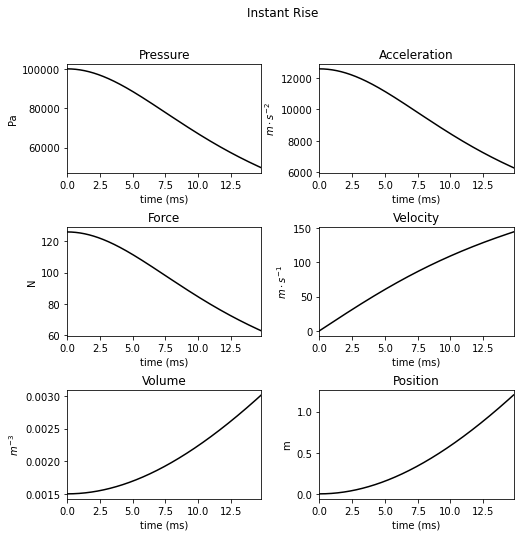

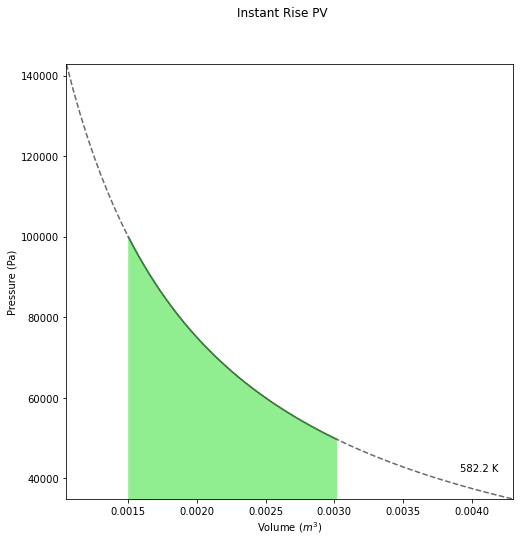

In [6]:
test = Instant_Rise(1e5,1e-5)
Kinetic_Model_Plotter(test,'Instant Rise')
PV_Plotter(test,'Instant Rise PV')

0.0 425.40966617284033 (66,)


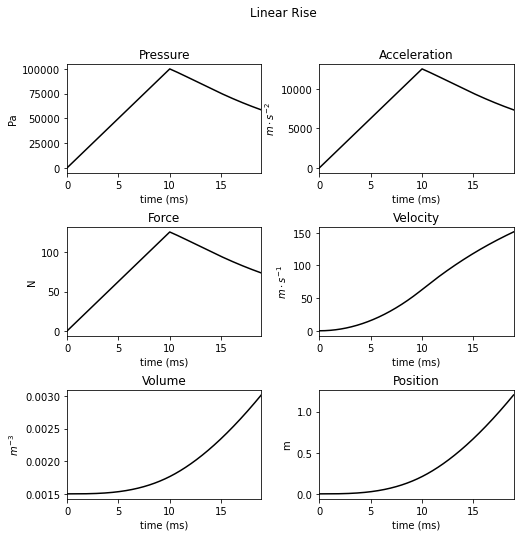

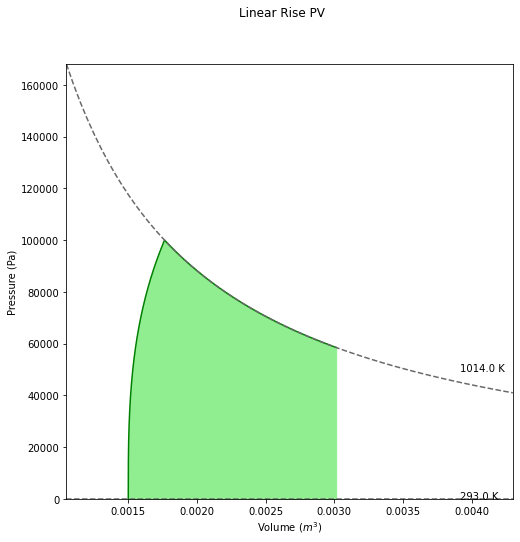

In [7]:
test2 = Linear_Rise(1e5,10e-3,1e-5)
Kinetic_Model_Plotter(test2,'Linear Rise')
# you can delete atmospheric if you'd like. It adjusts the isotherm
# estimates to be more realistic to Fort Collins conditions
# You can also add the atmospheric argument to the previous example
PV_Plotter(test2,'Linear Rise PV',atmospheric=81000.)